In [1]:
import re  
import pandas as pd  
import numpy as np
from time import time  
from collections import defaultdict  
import spacy  
import multiprocessing
from gensim.models import Word2Vec

import logging  
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [2]:
df = pd.read_csv("/kaggle/input/stm-1005/data_clean1003.csv")
df = df.dropna(subset=["text"])
df = df.reset_index(drop=True)
df['ls_text'] = df['text'].str.split()
df

,year,text,ip,user,tag,zan,num,ls_text
0,2024,部门 联合 加快 农村 指导 意见 全国 层面 农村 做出 部署 农村 新 戳,NaN,普通用户,#1.2亿农村老人如何养老#,1.0,1,"[部门, 联合, 加快, 农村, 指导, 意见, 全国, 层面, 农村, 做出, 部署, 农..."
1,2024,老年学 研究所 所长 国家 背景 国家 推出 推进 服务体系 意见 清单 面向 农村 能力 ...,NaN,蓝V,#1.2亿农村老人如何养老#,1.0,2,"[老年学, 研究所, 所长, 国家, 背景, 国家, 推出, 推进, 服务体系, 意见, 清..."
2,2024,农村 老年人 文件 作出 部署,NaN,黄V,#1.2亿农村老人如何养老#,1.0,3,"[农村, 老年人, 文件, 作出, 部署]"
3,2024,老年学 研究所 所长 国家 背景 国家 推出 推进 服务体系 意见 清单 面向 农村 能力 ...,NaN,蓝V,#1.2亿农村老人如何养老#,0.0,4,"[老年学, 研究所, 所长, 国家, 背景, 国家, 推出, 推进, 服务体系, 意见, 清..."
4,2024,老年学 研究所 所长 国家 背景 国家 推出 推进 服务体系 意见 清单 面向 农村 能力 ...,NaN,蓝V,#1.2亿农村老人如何养老#,2.0,5,"[老年学, 研究所, 所长, 国家, 背景, 国家, 推出, 推进, 服务体系, 意见, 清..."
...,...,...,...,...,...,...,...,...
273057,2021,民警 走失 老年人家 属 送到 老年人 家人 团聚 老年人 女婿 民警 离开 民警 嘱咐 老...,NaN,黄V,#齐齐哈尔一老人晕倒在高速隔离带旁边#,0.0,284714,"[民警, 走失, 老年人家, 属, 送到, 老年人, 家人, 团聚, 老年人, 女婿, 民警..."
273058,2021,名字 民警 户口 民警 低保 送 衣服 送 米面 帮 囤 送来 感冒药 饺子 月饼 民警 问候,NaN,黄V,#齐齐哈尔民警接力二十载照顾独居老人#,0.0,284715,"[名字, 民警, 户口, 民警, 低保, 送, 衣服, 送, 米面, 帮, 囤, 送来, 感..."
273059,2021,团圆 日子 民警 身影 民警 照顾 责任,NaN,黄V,#齐齐哈尔民警接力二十载照顾独居老人#,0.0,284716,"[团圆, 日子, 民警, 身影, 民警, 照顾, 责任]"
273060,2021,老年人 委托 朋友 写 感谢信 民警 讲 讲 完 我会 写字 写 感谢,NaN,黄V,#齐齐哈尔民警接力二十载照顾独居老人#,0.0,284717,"[老年人, 委托, 朋友, 写, 感谢信, 民警, 讲, 讲, 完, 我会, 写字, 写, 感谢]"


In [3]:
sentences = df['ls_text'].tolist()

In [4]:
# 待调参
w2v_model = Word2Vec(
    window=12,
    min_count=3,
    vector_size=300
)

In [5]:
t = time()
w2v_model.build_vocab(sentences, progress_per=1000)
print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.02 mins


In [6]:
t = time()
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 3.13 mins


In [7]:
w2v_model.init_sims(replace=True)

/tmp/ipykernel_17/514372312.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [8]:
 w2v_model.wv['老年人']

array([ 1.02094799e-01,  3.47057246e-02, -8.07394832e-03,  6.63039386e-02,
        4.90948968e-02,  7.70804435e-02,  3.81948240e-02, -2.76269633e-02,
        2.81397048e-02,  1.00578338e-01, -2.27464698e-02,  7.09330663e-02,
        1.28314020e-02, -3.23086716e-02,  2.73345690e-02,  4.19800282e-02,
       -4.74768505e-03,  1.19349565e-02,  2.06177309e-02, -2.68028234e-03,
       -6.34828284e-02, -1.00788986e-02, -8.10658261e-02, -2.42717993e-02,
        7.20846951e-02, -1.05672114e-01,  2.60774251e-02, -1.00839250e-02,
        4.81261238e-02,  8.89896881e-03, -3.90602797e-02, -4.81941178e-02,
        2.02382337e-02,  7.10467109e-03, -1.38251511e-02, -2.67251153e-02,
       -3.47648188e-02, -6.75494820e-02,  1.07763689e-02,  4.43498418e-02,
        2.44568754e-02,  4.35365476e-02, -5.30164950e-02, -8.19980279e-02,
       -5.18232062e-02, -7.15984963e-03,  9.18040052e-02,  8.05012956e-02,
        3.41911986e-03,  6.01297319e-02,  2.81859040e-02,  4.44727764e-03,
        2.87079886e-02,  

In [9]:
w2v_model.wv.most_similar(positive=["老年人"]) # 最相关

[('老年人家', 0.4656517207622528),
 ('老', 0.4109269976615906),
 ('子女', 0.40306997299194336),
 ('情况', 0.39768490195274353),
 ('社区', 0.36118078231811523),
 ('家人', 0.3312988579273224),
 ('儿女', 0.3144264221191406),
 ('群体', 0.3131183981895447),
 ('独居', 0.30879104137420654),
 ('关心', 0.30645859241485596)]

In [10]:
w2v_model.wv.most_similar(negative=["老年人"]) # 最无关

[('哦哦哦', 0.6149019002914429),
 ('阅阅', 0.396180123090744),
 ('已阅', 0.39379334449768066),
 ('炸', 0.36372214555740356),
 ('丑', 0.3544546663761139),
 ('贵妃醉酒', 0.3499293327331543),
 ('蘑菇', 0.347750186920166),
 ('刷车', 0.347531795501709),
 ('扫黑', 0.34645235538482666),
 ('马首', 0.34625864028930664)]

In [11]:
w2v_model.wv.similarity("老年人", "负担")

0.1271812

In [12]:
w2v_model.wv.similarity("老年人", "疫苗")

0.06672473

In [13]:
w2v_model.wv.similarity("老年人", "依赖")

0.2200829

In [14]:
w2v_model.wv.similarity("老年人", "责任")

0.10499667

In [15]:
w2v_model.wv.similarity("老年人", "医院")

0.19852139

In [16]:
w2v_model.wv.similarity("老年人", "衣服")

-0.02157983

# 可视化1

In [17]:
w2v_model.wv.most_similar("年轻人", topn=10)

[('青年人', 0.3889637291431427),
 ('年轻', 0.3789117932319641),
 ('主力军', 0.376687228679657),
 ('中年人', 0.3463866412639618),
 ('精力', 0.33800506591796875),
 ('年轻一代', 0.3355944752693176),
 ('老一辈', 0.33375298976898193),
 ('挂帘', 0.3313075304031372),
 ('生活节奏', 0.3295014500617981),
 ('现代人', 0.32227441668510437)]

In [18]:
w2v_model.wv.most_similar("老年人", topn=10)

[('老年人家', 0.4656517207622528),
 ('老', 0.4109269976615906),
 ('子女', 0.40306997299194336),
 ('情况', 0.39768490195274353),
 ('社区', 0.36118078231811523),
 ('家人', 0.3312988579273224),
 ('儿女', 0.3144264221191406),
 ('群体', 0.3131183981895447),
 ('独居', 0.30879104137420654),
 ('关心', 0.30645859241485596)]

In [19]:
import matplotlib.pyplot as plt
import matplotlib
import platform
import matplotlib_inline
from matplotlib.font_manager import FontProperties
matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'svg')

# 设置中文字体路径
font_path = '/kaggle/input/my-font/Droid-Sans-Fallback-Regular-2.ttf'  # 替换为你上传的字体文件路径
font_prop = FontProperties(fname=font_path)

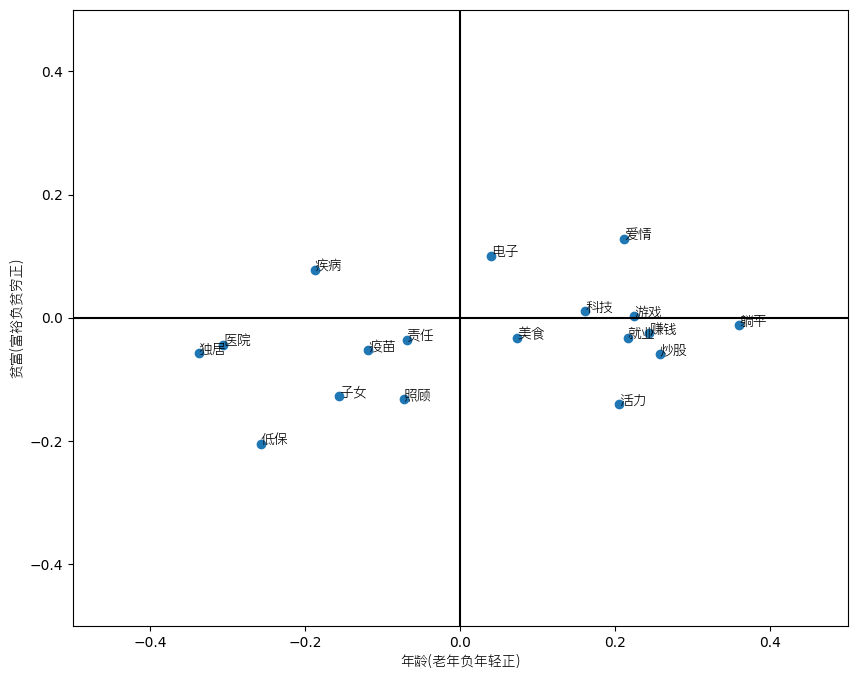

In [20]:
# 获取需要绘制的单词列表
words = ['疫苗', '照顾', '医院', '独居', '子女', '赚钱', '责任', '科技', '炒股','美食',
         '低保','游戏','电子','躺平', '疾病','爱情','活力','就业']
# words_young = [word for word, _ in w2v_model.wv.most_similar(positive=["年轻人"], topn=50)]
# words_old = [word for word, _ in w2v_model.wv.most_similar(positive=["老年人"], topn=50)]
# words = words_young + words_old

wiki_wv = w2v_model.wv # 词向量

# 获取词向量，并转换为 NumPy 数组
vectors = np.array([wiki_wv[word] for word in words])

# 选择两个词向量作为新坐标系的 x 轴和 y 轴
x_axis = wiki_wv[['年轻人']].mean(axis=0) - wiki_wv[['老年人']].mean(axis=0)
y_axis = wiki_wv[['贫穷']].mean(axis=0) - wiki_wv[['富裕']].mean(axis=0)

# 计算每个词向量在新坐标系中的投影
x_coords = np.dot(vectors, x_axis)
y_coords = np.dot(vectors, y_axis)

# 绘制图形
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x_coords, y_coords)

for i, word in enumerate(words):
    ax.annotate(word, (x_coords[i], y_coords[i]), fontproperties=font_prop)

# 绘制 x 轴和 y 轴的十字线
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)

plt.xlabel('年龄(老年负年轻正)', fontproperties=font_prop)
plt.ylabel('贫富(富裕负贫穷正)', fontproperties=font_prop)

plt.show()

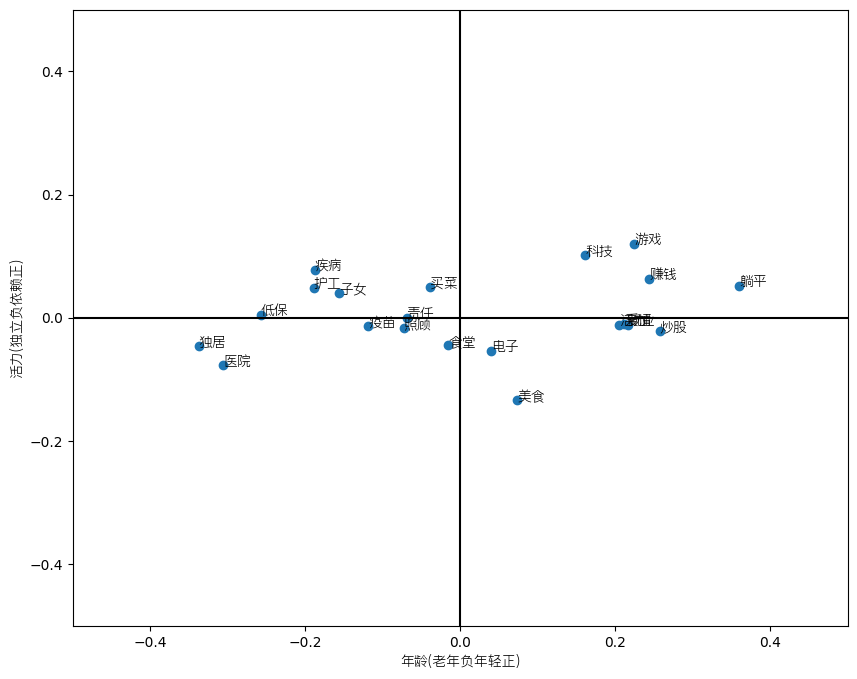

In [21]:
# 获取需要绘制的单词列表
words = ['疫苗', '照顾', '医院', '独居', '子女', '赚钱', '责任', '科技', '炒股','美食',
         '低保','游戏','电子','躺平', '疾病','爱情','活力','就业','护工','买菜','食堂']
# words_young = [word for word, _ in w2v_model.wv.most_similar(positive=["年轻人"], topn=50)]
# words_old = [word for word, _ in w2v_model.wv.most_similar(positive=["老年人"], topn=50)]
# words = words_young + words_old

wiki_wv = w2v_model.wv # 词向量

# 获取词向量，并转换为 NumPy 数组
vectors = np.array([wiki_wv[word] for word in words])

# 选择两个词向量作为新坐标系的 x 轴和 y 轴
x_axis = wiki_wv[['年轻人']].mean(axis=0) - wiki_wv[['老年人']].mean(axis=0)
y_axis = wiki_wv[['依赖']].mean(axis=0) - wiki_wv[['独立']].mean(axis=0)

# 计算每个词向量在新坐标系中的投影
x_coords = np.dot(vectors, x_axis)
y_coords = np.dot(vectors, y_axis)

# 绘制图形
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x_coords, y_coords)

for i, word in enumerate(words):
    ax.annotate(word, (x_coords[i], y_coords[i]), fontproperties=font_prop)

# 绘制 x 轴和 y 轴的十字线
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)

plt.xlabel('年龄(老年负年轻正)', fontproperties=font_prop)
plt.ylabel('活力(独立负依赖正)', fontproperties=font_prop)

plt.show()

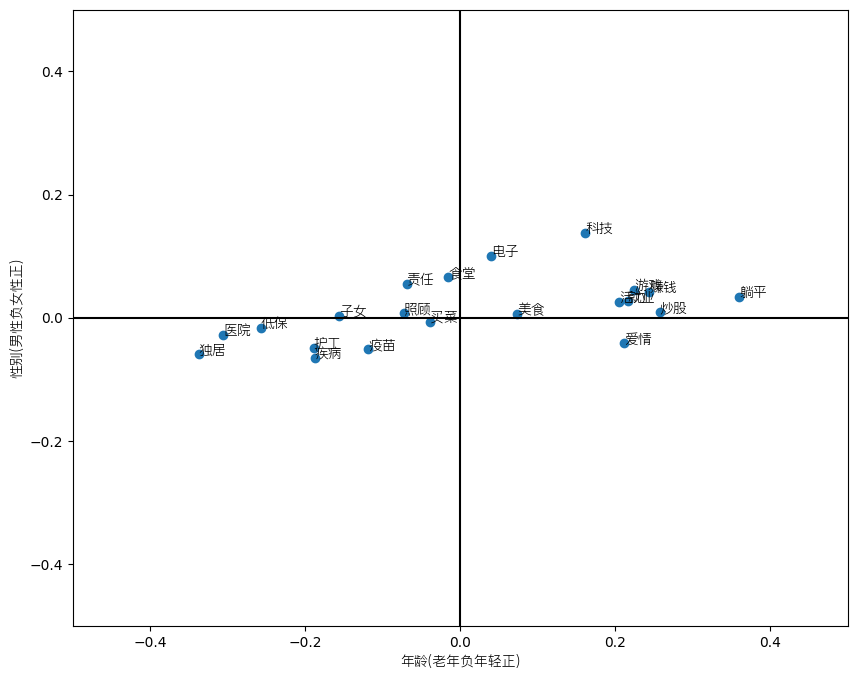

In [22]:
# 获取需要绘制的单词列表
words = ['疫苗', '照顾', '医院', '独居', '子女', '赚钱', '责任', '科技', '炒股','美食',
         '低保','游戏','电子','躺平', '疾病','爱情','活力','就业','护工','买菜','食堂']
# words_young = [word for word, _ in w2v_model.wv.most_similar(positive=["年轻人"], topn=50)]
# words_old = [word for word, _ in w2v_model.wv.most_similar(positive=["老年人"], topn=50)]
# words = words_young + words_old

wiki_wv = w2v_model.wv # 词向量

# 获取词向量，并转换为 NumPy 数组
vectors = np.array([wiki_wv[word] for word in words])

# 选择两个词向量作为新坐标系的 x 轴和 y 轴
x_axis = wiki_wv[['年轻人']].mean(axis=0) - wiki_wv[['老年人']].mean(axis=0)
y_axis = wiki_wv[['女性']].mean(axis=0) - wiki_wv[['男性']].mean(axis=0)

# 计算每个词向量在新坐标系中的投影
x_coords = np.dot(vectors, x_axis)
y_coords = np.dot(vectors, y_axis)

# 绘制图形
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x_coords, y_coords)

for i, word in enumerate(words):
    ax.annotate(word, (x_coords[i], y_coords[i]), fontproperties=font_prop)

# 绘制 x 轴和 y 轴的十字线
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)

plt.xlabel('年龄(老年负年轻正)', fontproperties=font_prop)
plt.ylabel('性别(男性负女性正)', fontproperties=font_prop)

plt.show()

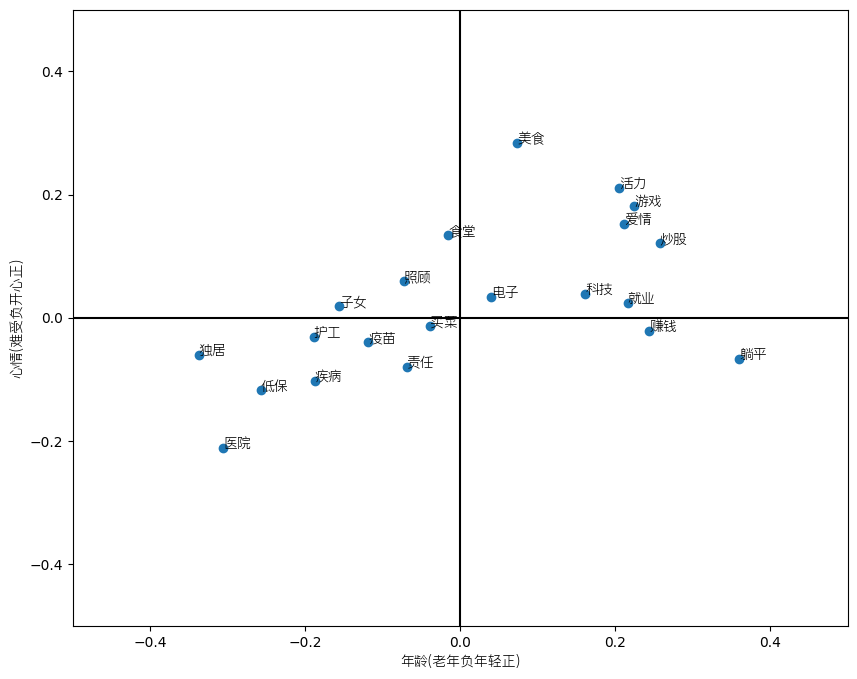

In [23]:
# 获取需要绘制的单词列表
words = ['疫苗', '照顾', '医院', '独居', '子女', '赚钱', '责任', '科技', '炒股','美食',
         '低保','游戏','电子','躺平', '疾病','爱情','活力','就业','护工','买菜','食堂']
# words_young = [word for word, _ in w2v_model.wv.most_similar(positive=["年轻人"], topn=50)]
# words_old = [word for word, _ in w2v_model.wv.most_similar(positive=["老年人"], topn=50)]
# words = words_young + words_old

wiki_wv = w2v_model.wv # 词向量

# 获取词向量，并转换为 NumPy 数组
vectors = np.array([wiki_wv[word] for word in words])

# 选择两个词向量作为新坐标系的 x 轴和 y 轴
x_axis = wiki_wv[['年轻人']].mean(axis=0) - wiki_wv[['老年人']].mean(axis=0)
y_axis = wiki_wv[['开心']].mean(axis=0) - wiki_wv[['难受']].mean(axis=0)

# 计算每个词向量在新坐标系中的投影
x_coords = np.dot(vectors, x_axis)
y_coords = np.dot(vectors, y_axis)

# 绘制图形
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x_coords, y_coords)

for i, word in enumerate(words):
    ax.annotate(word, (x_coords[i], y_coords[i]), fontproperties=font_prop)

# 绘制 x 轴和 y 轴的十字线
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)

plt.xlabel('年龄(老年负年轻正)', fontproperties=font_prop)
plt.ylabel('心情(难受负开心正)', fontproperties=font_prop)

plt.show()

# 可视化1.1

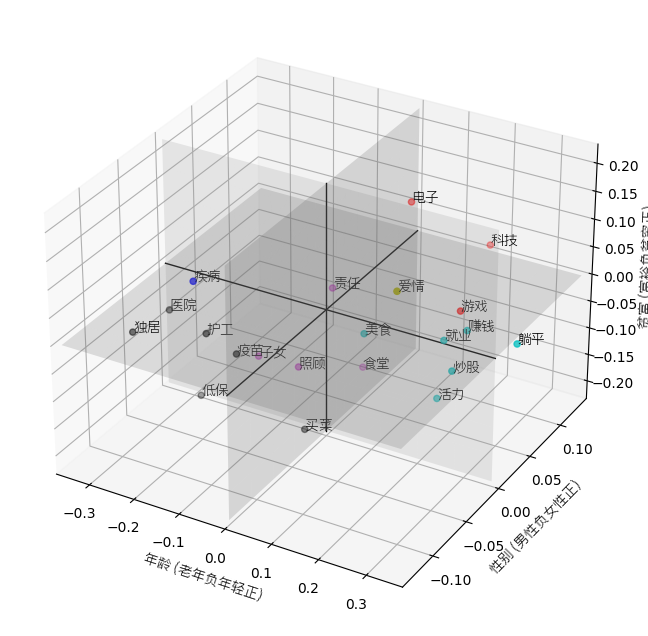

In [24]:
# 获取需要绘制的单词列表
words = ['疫苗', '照顾', '医院', '独居', '子女', '赚钱', '责任', '科技', '炒股', '美食',
         '低保', '游戏', '电子', '躺平', '疾病', '爱情', '活力', '就业', '护工', '买菜', '食堂']

# 假设你已经有了 word2vec 模型并且它已经加载
wiki_wv = w2v_model.wv  # 词向量

# 获取词向量，并转换为 NumPy 数组
vectors = np.array([wiki_wv[word] for word in words])

# 选择三个词向量作为新坐标系的 x 轴、y 轴和 z 轴
x_axis = wiki_wv[['年轻人']].mean(axis=0) - wiki_wv[['老年人']].mean(axis=0)
y_axis = wiki_wv[['女性']].mean(axis=0) - wiki_wv[['男性']].mean(axis=0)
z_axis = wiki_wv[['贫穷']].mean(axis=0) - wiki_wv[['富裕']].mean(axis=0)

# 计算每个词向量在新坐标系中的投影
x_coords = np.dot(vectors, x_axis)
y_coords = np.dot(vectors, y_axis)
z_coords = np.dot(vectors, z_axis)

# 设置颜色映射：根据 x, y, z 值的正负来决定颜色
colors = []
for x, y, z in zip(x_coords, y_coords, z_coords):
    if x >= 0 and y >= 0 and z >= 0:
        colors.append('r')  # 第一象限：红色
    elif x < 0 and y >= 0 and z >= 0:
        colors.append('g')  # 第二象限：绿色
    elif x < 0 and y < 0 and z >= 0:
        colors.append('b')  # 第三象限：蓝色
    elif x >= 0 and y < 0 and z >= 0:
        colors.append('y')  # 第四象限：黄色
    elif x >= 0 and y >= 0 and z < 0:
        colors.append('c')  # 第五象限：青色
    elif x < 0 and y >= 0 and z < 0:
        colors.append('m')  # 第六象限：品红
    elif x < 0 and y < 0 and z < 0:
        colors.append('k')  # 第七象限：黑色
    else:
        colors.append('orange')  # 第八象限：橙色

# 绘制三维图形
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点
scatter = ax.scatter(x_coords, y_coords, z_coords, c=colors, marker='o')

# 添加坐标轴线
ax.plot([-max(np.abs(x_coords)), max(np.abs(x_coords))], [0, 0], [0, 0], color='black', linewidth=1)  # X轴
ax.plot([0, 0], [-max(np.abs(y_coords)), max(np.abs(y_coords))], [0, 0], color='black', linewidth=1)  # Y轴
ax.plot([0, 0], [0, 0], [-max(np.abs(z_coords)), max(np.abs(z_coords))], color='black', linewidth=1)  # Z轴

# 绘制 X-Y 平面
xx, yy = np.meshgrid(np.linspace(-max(np.abs(x_coords)), max(np.abs(x_coords)), 10),
                     np.linspace(-max(np.abs(y_coords)), max(np.abs(y_coords)), 10))
zz = np.zeros_like(xx)
ax.plot_surface(xx, yy, zz, color='gray', alpha=0.2)

# 绘制 Y-Z 平面
yy, zz = np.meshgrid(np.linspace(-max(np.abs(y_coords)), max(np.abs(y_coords)), 10),
                     np.linspace(-max(np.abs(z_coords)), max(np.abs(z_coords)), 10))
xx = np.zeros_like(yy)
ax.plot_surface(xx, yy, zz, color='lightgray', alpha=0.2)

# 绘制 X-Z 平面
xx, zz = np.meshgrid(np.linspace(-max(np.abs(x_coords)), max(np.abs(x_coords)), 10),
                     np.linspace(-max(np.abs(z_coords)), max(np.abs(z_coords)), 10))
yy = np.zeros_like(xx)
ax.plot_surface(xx, yy, zz, color='darkgray', alpha=0.2)

# 为每个点添加向量和文本标注
for i, word in enumerate(words):
    # 添加文本标注
    ax.text(x_coords[i], y_coords[i], z_coords[i], word, fontproperties=font_prop)

# 确定坐标范围
x_range = (-max(np.abs(x_coords)), max(np.abs(x_coords)))
y_range = (-max(np.abs(y_coords)), max(np.abs(y_coords)))
z_range = (-max(np.abs(z_coords)), max(np.abs(z_coords)))

# 设置坐标轴范围
ax.set_xlim(x_range)
ax.set_ylim(y_range)
ax.set_zlim(z_range)

# 设置坐标轴标签
ax.set_xlabel('年龄 (老年负年轻正)', fontproperties=font_prop)
ax.set_ylabel('性别 (男性负女性正)', fontproperties=font_prop)
ax.set_zlabel('贫富 (富裕负贫穷正)', fontproperties=font_prop)

plt.show()

In [25]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go


# 获取需要绘制的单词列表
words = ['疫苗', '照顾', '医院', '独居', '子女', '赚钱', '责任', '科技', '炒股', '美食',
         '低保', '游戏', '电子', '躺平', '疾病', '爱情', '活力', '就业', '护工', '买菜', '食堂']

# 假设你已经有了 word2vec 模型并且它已经加载
wiki_wv = w2v_model.wv  # 词向量

# 获取词向量，并转换为 NumPy 数组
vectors = np.array([wiki_wv[word] for word in words])

# 选择三个词向量作为新坐标系的 x 轴、y 轴和 z 轴
x_axis = wiki_wv[['年轻人']].mean(axis=0) - wiki_wv[['老年人']].mean(axis=0)
y_axis = wiki_wv[['女性']].mean(axis=0) - wiki_wv[['男性']].mean(axis=0)
z_axis = wiki_wv[['贫穷']].mean(axis=0) - wiki_wv[['富裕']].mean(axis=0)

# 计算每个词向量在新坐标系中的投影
x_coords = np.dot(vectors, x_axis)
y_coords = np.dot(vectors, y_axis)
z_coords = np.dot(vectors, z_axis)

# 设置颜色映射：根据 x, y, z 值的正负来决定颜色
colors = []
for x, y, z in zip(x_coords, y_coords, z_coords):
    if x >= 0 and y >= 0 and z >= 0:
        colors.append('red')  # 第一象限：红色
    elif x < 0 and y >= 0 and z >= 0:
        colors.append('green')  # 第二象限：绿色
    elif x < 0 and y < 0 and z >= 0:
        colors.append('blue')  # 第三象限：蓝色
    elif x >= 0 and y < 0 and z >= 0:
        colors.append('yellow')  # 第四象限：黄色
    elif x >= 0 and y >= 0 and z < 0:
        colors.append('cyan')  # 第五象限：青色
    elif x < 0 and y >= 0 and z < 0:
        colors.append('magenta')  # 第六象限：品红
    elif x < 0 and y < 0 and z < 0:
        colors.append('black')  # 第七象限：黑色
    else:
        colors.append('orange')  # 第八象限：橙色

# 创建 Plotly 3D 散点图
scatter = go.Scatter3d(
    x=x_coords,
    y=y_coords,
    z=z_coords,
    mode='markers+text',
    marker=dict(
        size=3,
        color=colors,
        opacity=0.8
    ),
    text=words,
    textposition="top center"
)

# 添加原点标记
origin_marker = go.Scatter3d(
    x=[0],
    y=[0],
    z=[0],
    mode='markers',
    marker=dict(size=4, color='black'),
    textposition="bottom center"
)

# 创建从原点到每个点的线段
lines = []
for x, y, z in zip(x_coords, y_coords, z_coords):
    lines.append(go.Scatter3d(
        x=[0, x],
        y=[0, y],
        z=[0, z],
        mode='lines',
        line=dict(color='lightgray', width=4)
    ))

# 设置布局
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='年龄 (老年负年轻正)'),
        yaxis=dict(title='性别 (男性负女性正)'),
        zaxis=dict(title='贫富 (富裕负贫穷正)')
    ),
    width=1200,
    height=1200,
    title='三维词向量可视化'
)

# 创建图形对象
fig = go.Figure(data=[scatter] + lines + [origin_marker], layout=layout)

# 显示图形
iplot(fig)

# 可视化2 TSNE

In [26]:
from sklearn.manifold import TSNE

def tsne_plot(model, words_to_plot):
    """
    Creates a TSNE model and plots it for a given list of words.
    
    Parameters:
    model: Gensim Word2Vec model
    words_to_plot: List of words to plot
    """
    tokens = []
    labels = words_to_plot[:]

    # 获取给定词汇的词向量
    for word in words_to_plot:
        if word in model.wv:
            tokens.append(model.wv[word])
        else:
            print(f"Word '{word}' not found in the model's vocabulary.")
            labels.remove(word)
    
    # 将tokens列表转换为NumPy数组
    tokens = np.array(tokens)

    # 使用t-SNE进行降维
    tsne_model = TSNE(perplexity=10, n_components=2, init='pca', n_iter=2000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    # 绘制t-SNE图
    plt.figure(figsize=(6, 6))
    for i, (x, y) in enumerate(zip(new_values[:, 0], new_values[:, 1])):
        plt.scatter(x, y)
        plt.annotate(labels[i],
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                    fontproperties=font_prop)
    plt.show()

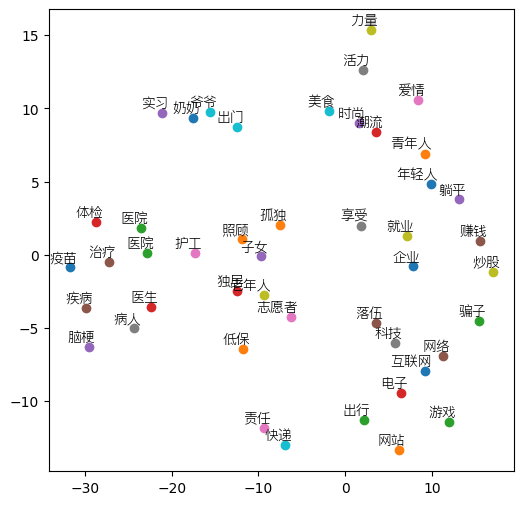

In [27]:
words = ['疫苗', '照顾', '医院', '独居', '子女', '赚钱', '责任', '科技', '炒股','美食','年轻人',
         '低保','游戏','电子','躺平', '疾病','爱情','活力','就业','爷爷','奶奶','青年人',
        "医院", "医生", "脑梗", "治疗", "护工", "病人","老年人",
        "快递", "企业", "网站", "出行", "体检","实习",'网络','志愿者','享受','力量','出门','互联网',
        '孤独','骗子','潮流','时尚','落伍']

tsne_plot(w2v_model, words)